[1][비지도 학습] unsupervised learning - K-means
* https://www.kaggle.com/moltean/fruits 에 공개된 data

In [2]:
!wget http://bit.ly/fruits_300_data -O fruits_300.npy

--2025-05-06 09:33:09--  http://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2025-05-06 09:33:09--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2025-05-06 09:33:10--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connect

In [4]:
# 각종 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score , recall_score, accuracy_score, f1_score


In [9]:
# 파일 가져오기
URL = '/content/fruits_300.npy'
fruits = np.load(URL)
#fruits = np.load('fruits_300.npy')

print(fruits.shape)                         # 배열의 크기 확인

(300, 100, 100)


#### 샘플의 개수(첫번째차원):300, 두번째 차원(이미지높이(세로): 100), 세번째차원(이미지너비(가로): 100)

[2]샘플의 개수 300개, 가로 100, 세로 100 에서 첫번째 이미지의 첫번째 행을 출력해 봄
(3차원 배열이기 때문에 2개의 인덱스를 0으로 지정, 마지막 인덱스는 지정하지 않거나 스라이싱 연산자를 쓰면 첫번재 이미지의 첫번째 해을 모두 선택할 수 있음  

In [10]:
# 첫 번째 이미지의 첫번째 행을 출력
# 3차원배열, 흑백사진, 0-255,
print(fruits[0, 0, :])

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


[3] 맷플롯립의 imshow() 함수를 사용하면 넘파이 배열로 저장된 이미지를 그릴 수 있음.
흑백 이미지로 cmap 매개변수를 'gray'로 지정함 ( 0: 검은색 , 255: 흰색)

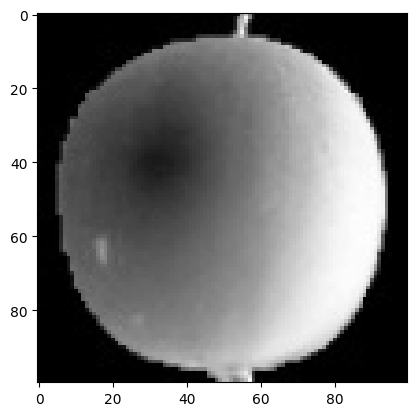

In [11]:
# plt.imshow() : 넘파이 배열로 저장된 이미지 그림 나타냄
plt.imshow(fruits[0], cmap='gray')      # 첫번째이미지
plt.show()

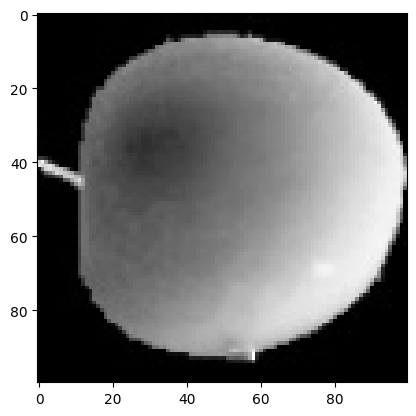

In [12]:
plt.imshow(fruits[99], cmap='gray')     # 100번째 이미지
plt.show()

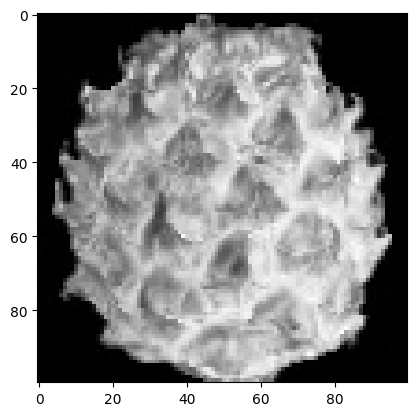

In [ ]:
plt.imshow(fruits[100], cmap='gray')    # 101번째 이미지
plt.show()

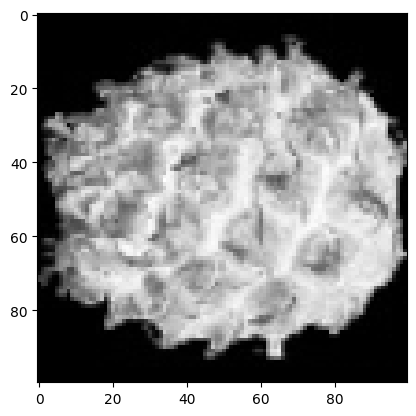

In [13]:
plt.imshow(fruits[199], cmap='gray')  # 200번째 이미지
plt.show()

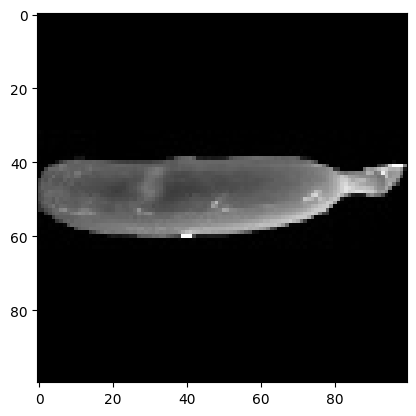

In [14]:
plt.imshow(fruits[200], cmap='gray')   # 201번째 이미지
plt.show()

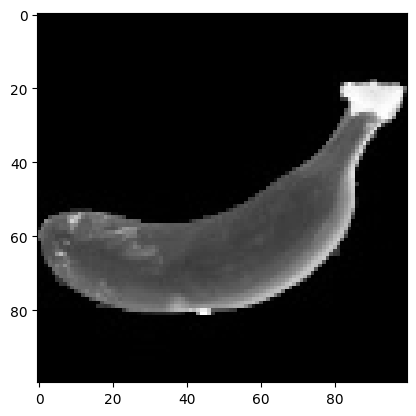

In [15]:
plt.imshow(fruits[299], cmap='gray')   # 299번째 이미지  (0-299 번이므로 사실상 300번째 이미지임)
plt.show()

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   2   2   1   1   1   2   1   1   1   2
   1   1   3   4   1   2   5   2   3   5   4 106 159 178 110   3   1   1
   3   2   1   1   1   2   2   1   1   2   1   2   5   1   2   2   1   3
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


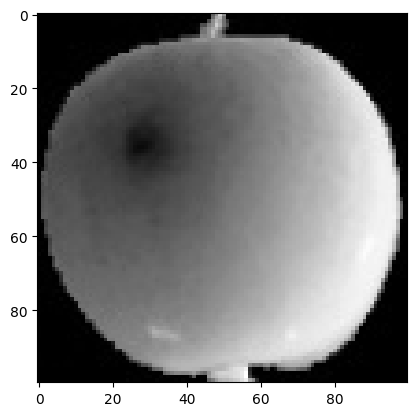

In [16]:
# fruit[1]    은 두번째 이미지임(0부터 시작하니까),
# fruit[1,1]  은 두번째 이미지의 두번째 행임
# fruit[1,1,:]은 두번째 이미지의 두번째 행에 있는 모든 요소(열)선택
print(fruits[1, 1, :]) # 데이터 세트의 두 번째 이미지의 두 번째 행의 픽셀 값을 인쇄합니다
plt.imshow(fruits[1], cmap='gray')
plt.show()


[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   1   1   2   2   1   1   2   2
   1   1   2   1   1   1   1   2   3   2   1   2   2   4   3   3   1  24
 141 193 138  16   1   5   1   1   1   4   1   1   1   1   2   3   2   1
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


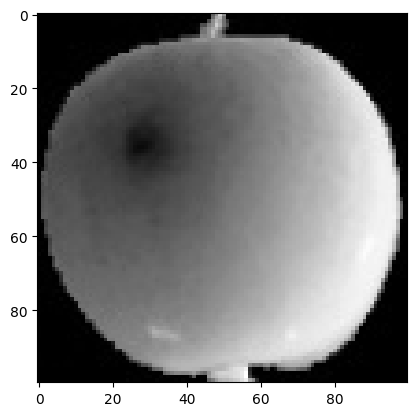

In [17]:
# fruit[2]    은 세번째 이미지임(0부터 시작하니까),
# fruit[2,2]  은 세번째 이미지의 세번째 행임
# fruit[2,2,:]은 세번째 이미지의 세번째 행에 있는 모든 요소(열)선택
print(fruits[2, 2, :])
plt.imshow(fruits[1], cmap='gray')
plt.show()

(활용 if) 10개씩 묵어서 출력 본다면...

In [18]:
for i in range(2, len(fruits[2,2]), 10):   # 별 도움 안되는 코드..(for문을 만들어봄)
  print(fruits[2, 2, i:i+10])


[1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 2 2]
[1 1 2 2 1 1 2 1 1 1]
[1 2 3 2 1 2 2 4 3 3]
[  1  24 141 193 138  16   1   5   1   1]
[1 4 1 1 1 1 2 3 2 1]
[1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1]


[4] 종종 흑백 이미지를 반전함, cmap 매개변수를 'gray_r'로 지정하면됨
 ( 0:밝은 쪽,  255:어두운쪽)

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   1   1   2   2   1   1   2   2
   1   1   2   1   1   1   1   2   3   2   1   2   2   4   3   3   1  24
 141 193 138  16   1   5   1   1   1   4   1   1   1   1   2   3   2   1
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


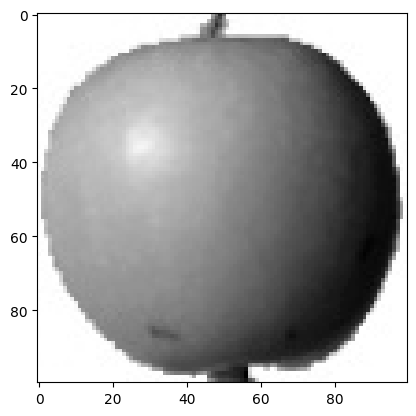

In [19]:
# 흑백 사진 반전
print(fruits[2, 2, :])
plt.imshow(fruits[1], cmap='gray_r')  # 흑백사진 반전
plt.show()

[5] 사과, 바나나, 파인애플이 각각 100개씩 있음, 모두 이미지 출력함
(1,3 => 1행 3열, subplots()은 여러 개의 그래프를 배열처럼 쌓을수 있음

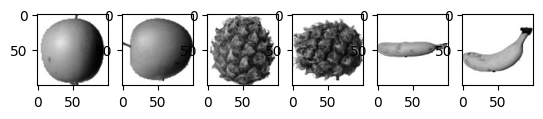

In [20]:
# 그림을 확인
fig,axs = plt.subplots(1, 6)
axs[0].imshow(fruits[0], cmap='gray_r')
axs[1].imshow(fruits[99], cmap='gray_r')
axs[2].imshow(fruits[100], cmap='gray_r')
axs[3].imshow(fruits[199], cmap='gray_r')
axs[4].imshow(fruits[200], cmap='gray_r')
axs[5].imshow(fruits[299], cmap='gray_r')
plt.show()


[6] fruit 배열에서 순서대로 100개씩 선택하기 위해 슬라이싱 연산자 사용
reshape() 메서드를 사용하여 두번째차원(100), 세번째차원(100)을 10,000으로 합침
첫번째 차원을 -1로 하면 자동으로 남은 차원을 할당함

In [22]:
# 픽셀값 분석 -> 100*100 = 10,000 인 1차원 배열
apple     = fruits[0:100].reshape(-1, 100*100)    # 첫번째 차원을 -1로 지정하면 자동으로 남은 차원을 할당함
pineapple = fruits[100:200].reshape(-1, 100*100)
banana    = fruits[200:300].reshape(-1, 100*100)

print(apple.shape)
print(pineapple.shape)
print(banana.shape)


(100, 10000)
(100, 10000)
(100, 10000)


[7] 각 과일 배열에 들어있는 샘플의 픽셀 평균값을 계산함
넘파이 mean()메서드 사용할 것임(평균을 계산할 축을 지정함)
axis=0(첫 번재 축인 행을 따라 계산함=>세로),
axis=1(두 번째 축인 열을 따라 계산함=>가로)(앞에서 2차원 100*100을 1차원으로 변경하였으므로)
우리는 샘플의 평균값이 필요함 (사과, 파인애플, 바나나 100개에 대한 픽셜 평균값을 계산해봄)

In [23]:
# 픽셀 평균값, axis 축을 따라 계산, axis=0: 세로 , axis=1 : 가로
print(apple.mean(axis=1))
print(pineapple.mean(axis=1))
print(banana.mean(axis=1))

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]
[ 99.3239  87.1622  97.193   97.4689  98.8892  97.8819  95.1444  92.9461
  95.8412  96

[활용 if] 결과들의 평균을 보자,, 그래픽의 가로와 비교할 수 있도록...

In [24]:
apple_mr=[  88.3346,  97.9249,  87.3709,  98.3703,  92.8705,  82.6439,  94.4244,  95.5999,
  90.681,   81.6226,  87.0578,  95.0745,  93.8416,  87.017,   97.5078,  87.2019,
  88.9827, 100.9158,  92.7823, 100.9184, 104.9854,  88.674,   99.5643,  97.2495,
  94.1179,  92.1935,  95.1671,  93.3322, 102.8967,  94.6695,  90.5285,  89.0744,
  97.7641,  97.2938, 100.7564,  90.5236, 100.2542,  85.8452,  96.4615,  97.1492,
  90.711,  102.3193,  87.1629,  89.8751,  86.7327,  86.3991,  95.2865,  89.1709,
  96.8163,  91.6604,  96.1065,  99.6829,  94.9718,  87.4812,  89.2596,  89.5268,
  93.799,   97.3983,  87.151,  97.825,  103.22,    94.4239,  83.6657, 83.5159,
 102.8453,  87.0379,  91.2742, 100.4848,  93.8388,  90.8568,  97.4616,  97.5022,
  82.446,   87.1789,  96.9206,  90.3135,  90.565,   97.6538,  98.0919,  93.6252,
  87.3867,  84.7073,  89.1135,  86.7646,  88.7301,  86.643,   96.7323,  97.2604,
  81.9424,  87.1687, 97.2066,  83.4712,  95.9781,  91.8096,  98.4086, 100.7823,
 101.556,  100.7027,  91.6098,  88.8976]
am = np.mean(apple_mr)
print("apple_mean_result: ", am)

pineapple_mr=[   99.3239,  87.1622,  97.193,   97.4689,  98.8892,  97.8819,  95.1444,  92.9461,
  95.8412,  96.9487,  93.2863, 101.2771,  91.6511,  98.3901,  84.3277, 100.7017,
  99.0229,  87.5298,  99.4109,  91.8568,  90.3877,  99.5066,  95.8498,  96.0728,
 100.0062,  95.5283,  95.2715,  98.1624,  93.1395,  99.1666,  99.9519,  96.732,
  94.16,   100.7644, 101.1263,  98.2852,  98.5354, 101.3809,  95.4862,  93.1256,
  87.6404,  93.7146,  94.7279,  85.5131,  95.0937,  95.3236,  92.7696,  94.4375,
  99.36,    95.8924,  97.8221,  99.4014,  99.325,   95.025,  97.5771,  97.3511,
  99.4891,  97.366,  101.0062,  91.2304,  95.2824,  95.3544, 101.4657,  97.5239,
  98.8419,  96.746,   98.2922,  96.3969,  81.9464,  93.4927,  97.3872,  82.4883,
  95.3665,  95.2541, 101.3074,  97.2391,  95.4544, 100.5576, 100.2927,  94.3088,
  95.7401,  97.0982,  96.9559,  92.9114,  97.4164, 100.769,   97.808,   99.2481,
 101.0643,  94.8173,  99.2639,  98.8539,  97.2198,  97.0201,  94.5039,  98.097,
  95.0201,  98.8078,  99.4634, 100.0257]
pm = np.mean(pineapple_mr)
print("apple_mean_result: ", pm)

banana_mr=[  19.5487, 24.4884, 36.7517, 18.568,  53.572,  31.5789, 51.9062, 28.4703, 23.7856,
 32.1295, 29.1737, 24.5578, 27.7676, 41.3082, 61.0437, 32.6444, 38.4187, 30.4175,
 30.0639, 21.4994, 32.6018, 39.6335, 47.8397, 57.7484, 33.6511, 23.5018, 49.6817,
 44.0855, 46.1559, 33.4963, 36.0099, 69.0751, 33.9575, 32.8786, 60.1911, 32.9949,
 45.3359, 56.1694, 36.9218, 25.6754, 32.7901, 29.0245, 57.7134, 44.6563, 31.2138,
 29.836,  40.9228, 23.7501, 43.1543, 32.3716, 26.0986, 55.6189, 22.2269, 29.5089,
 24.0435, 22.6247, 24.1709, 46.2714, 32.0763, 42.5076, 44.5522, 24.0199, 27.68,
 32.4377, 19.2198, 22.5083, 19.6742, 26.1852, 25.8368, 25.2676, 26.4721, 34.8503,
 28.5235, 80.8545, 36.9371, 47.3975, 18.7909, 33.0428, 37.8222, 34.7819, 33.6051,
 24.3963, 32.7988, 19.7609, 32.538,  28.5407, 23.0999, 26.3778, 27.1965, 38.7848,
 18.7648, 30.2297, 54.3816, 37.9073, 32.3126, 31.0664, 33.1657, 37.6051, 38.1806,
 26.2805]
bm = np.mean(banana_mr)
print("apple_mean_result: ", bm)

apple_mean_result:  92.987736
apple_mean_result:  96.260623
apple_mean_result:  34.597277000000005


[8] 막대 그래프로 표현
(위의 사과, 파인애플, 바나나 100개에 대한 픽셜 평균값을 가로축 값으로 보면 됨, 0.8은 투명도, 작을수록 투명해짐)

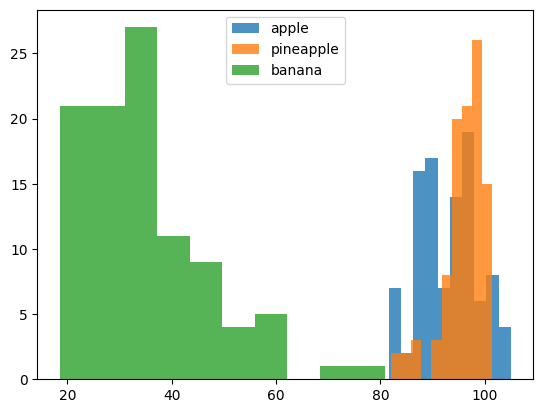

In [25]:
plt.hist(np.mean(apple,     axis=1), alpha=0.8)
plt.hist(np.mean(pineapple, axis=1), alpha=0.8)
plt.hist(np.mean(banana,    axis=1), alpha=0.8)
plt.legend(['apple', 'pineapple', 'banana'])

[9] 샘플의 평균값이 아니라 픽셀의 평균값을 비고해 보자
픽셀평균은 axis=0으로,
bar()를 사용해 픽셀 10,000개에 대한 평균값을 막대 그래프로 그림,
subplots()함수로 3개의 서브 그래프를 만들어 사과, 파인애플, 바나나

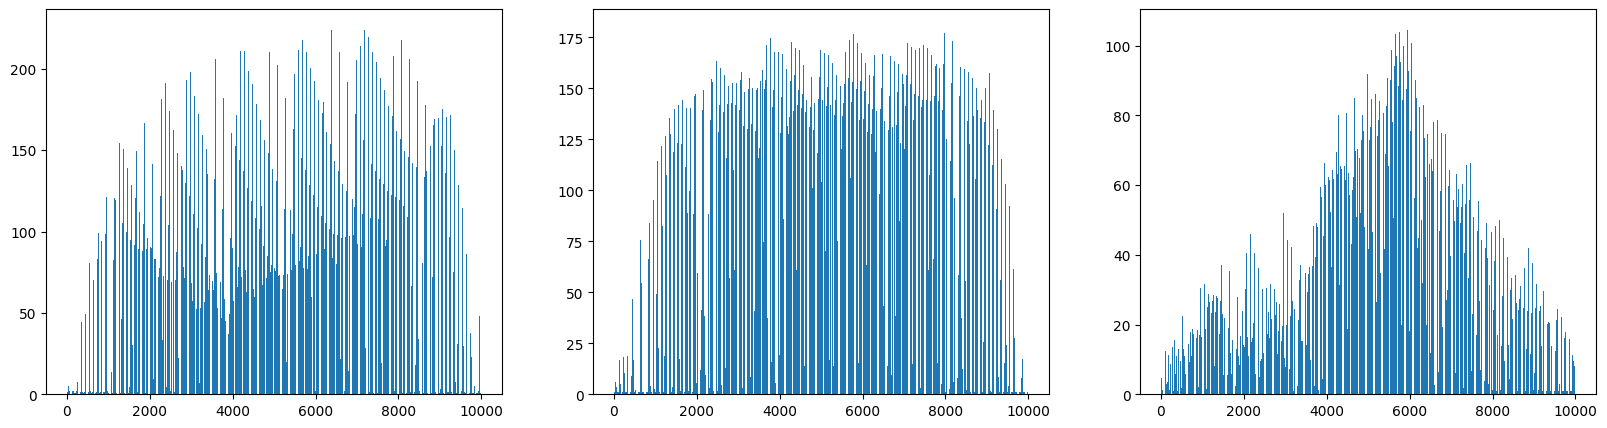

In [26]:
fig,axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].bar(range(10000), np.mean(apple, axis=0))
axs[1].bar(range(10000), np.mean(pineapple, axis=0))
axs[2].bar(range(10000), np.mean(banana, axis=0))
plt.show()

[10] 픽셀평균값을 100*100 크기로 바꿔서 이미지 출력

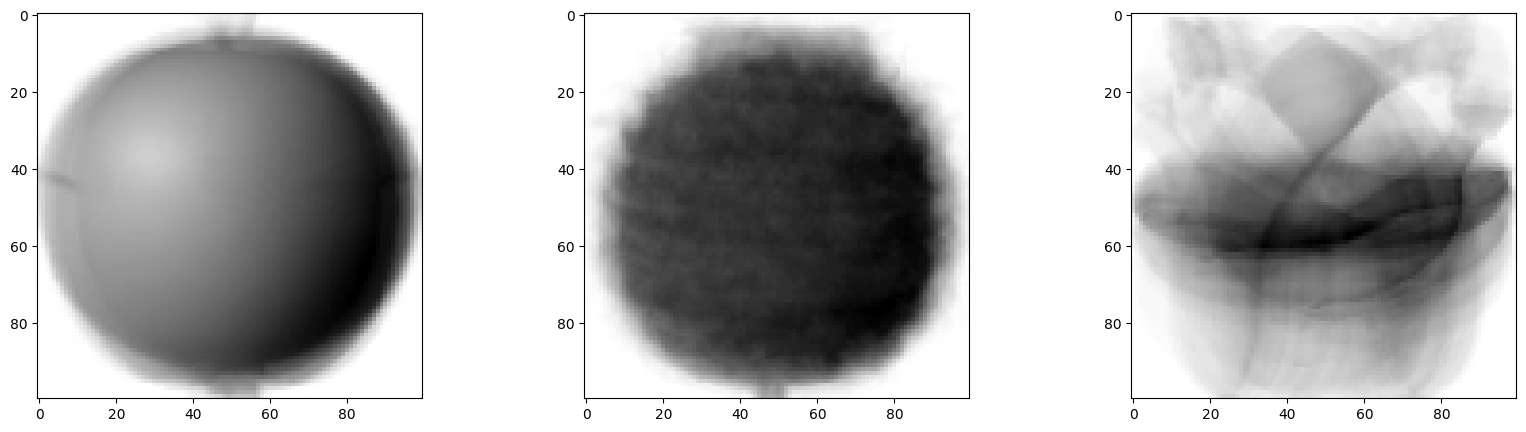

In [27]:
apple_mean     = np.mean(apple, axis=0).reshape(100, 100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100, 100)
banana_mean    = np.mean(banana, axis=0).reshape(100, 100)

fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].imshow(apple_mean,cmap='gray_r' )
axs[1].imshow(pineapple_mean,cmap='gray_r' )
axs[2].imshow(banana_mean,cmap='gray_r' )
plt.show()

[11] 평균값과 가까운 사진 고르기
fruits 배열에 있는 모든 샘플에서 - apple_mean을 뺀 절댓값의 평균을 계산함

In [ ]:
abs_diff = np.abs(fruits - apple_mean)
abs_mean = np.mean(abs_diff, axis=(1, 2))
print(abs_mean.shape)

(300,)


[12] 가장 작은 순서대로 100개 고름 (apple_mean과 오차가 가장 작은 샘플 100개)
 np.argsort()는 작은것에서  큰 순서대로 나열한 abs_mena배열의 인덱스를 반환
 100개를 선택해 10*10격자로 그림

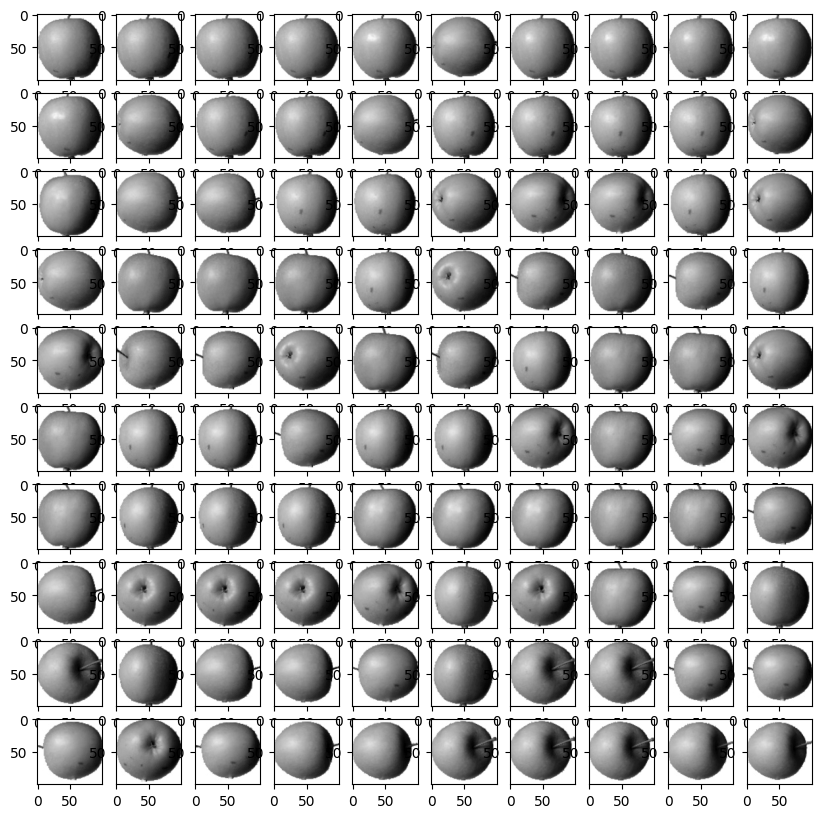

In [ ]:
apple_index=np.argsort(abs_mean)[: 100]
fig, axs = plt.subplots(10, 10, figsize=(10, 10))
for i in range(10):
  for j in range(10):
    axs[i, j].imshow(fruits[apple_index[i*10 + j]], cmap='gray_r')
    axs[i, j].axis('on')
plt.show()

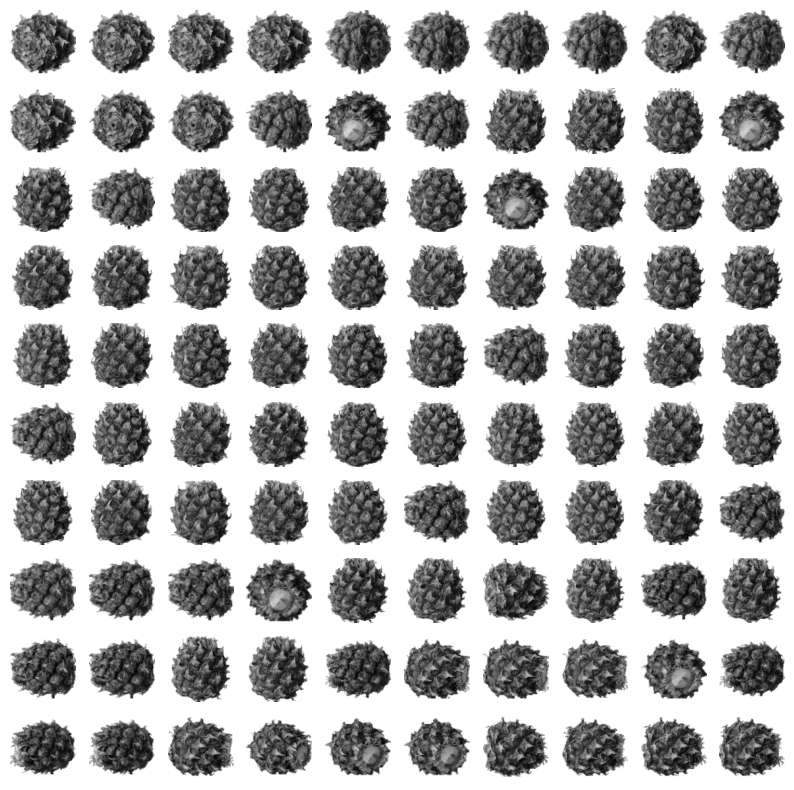

In [ ]:
pineapple_index=np.argsort(abs_mean)[100 : 200]
fig, axs = plt.subplots(10, 10, figsize=(10, 10))
for i in range(10):
  for j in range(10):
    axs[i, j].imshow(fruits[pineapple_index[i*10 + j]], cmap='gray_r')
    axs[i, j].axis('off')
plt.show()

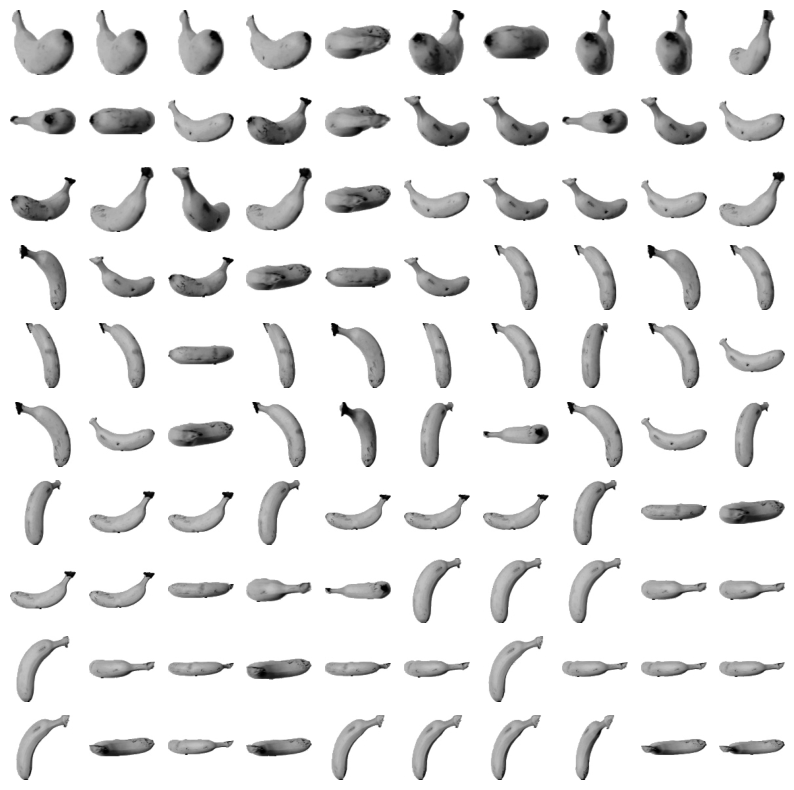

In [ ]:
banana_index=np.argsort(abs_mean)[200 : 300]
fig, axs = plt.subplots(10, 10, figsize=(10, 10))
for i in range(10):
  for j in range(10):
    axs[i, j].imshow(fruits[banana_index[i*10 + j]], cmap='gray_r')
    axs[i, j].axis('off')
plt.show()

In [28]:
# predict
x = np.load(URL)
x = x.reshape(-1, 100*100)
y = np.array([0]*100 + [1]*100 + [2]*100)

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3)

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(xtrain, ytrain)
pred = knn.predict(xtest)



In [29]:
print('혼동행렬(Confusion Matrix)')
print(confusion_matrix(ytest, pred))

accuracy = accuracy_score(ytest, pred)
precision = precision_score(ytest, pred, average = 'macro')
recall = recall_score(ytest, pred, average = 'macro')
f1 = f1_score(ytest, pred, average = 'macro')

print('')
print('정확도(accuracy) : ', accuracy)
print('정밀도(precision) : ', precision)
print('재현율(recall, sensitivity) : ', recall)
print('F1-score : ', f1)

혼동행렬(Confusion Matrix)
[[30  0  0]
 [ 0 33  0]
 [ 0  1 26]]

정확도(accuracy) :  0.9888888888888889
정밀도(precision) :  0.9901960784313726
재현율(recall, sensitivity) :  0.9876543209876543
F1-score :  0.9887355674457899


<Axes: >

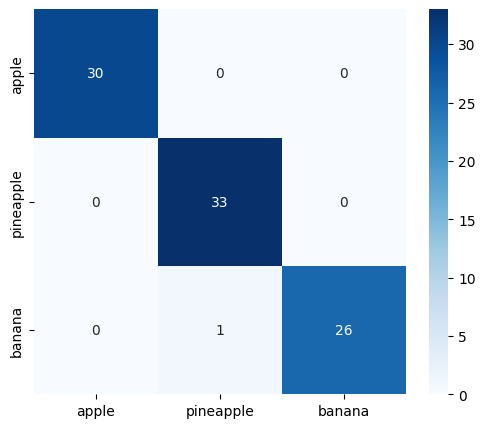

In [30]:
confusion = confusion_matrix(ytest, pred)
confusion_map = pd.DataFrame(confusion, index = ['apple','pineapple','banana'], columns = ['apple','pineapple','banana'])

plt.figure(figsize = (6,5))
sns.heatmap(confusion_map, annot = True, cmap='Blues')

In [31]:
total = np.sum(confusion, axis=1) # 각 행의 값을 전부 더함
confusion = confusion / total[:, None]
confusion

array([[1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.03703704, 0.96296296]])

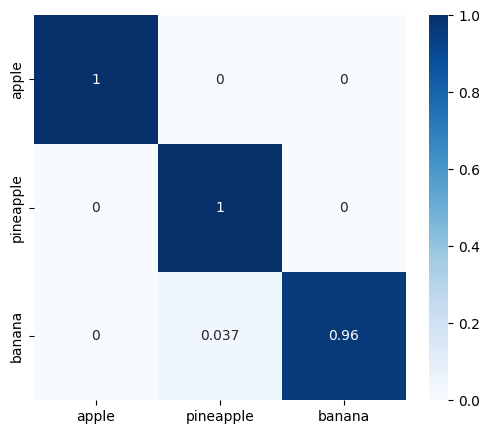

In [32]:
confusion_map_n = pd.DataFrame(confusion, index = ['apple','pineapple','banana'],
                               columns = ['apple','pineapple','banana'])
plt.figure(figsize = (6, 5))
sns.heatmap(confusion_map_n, cmap='Blues', annot = True)
plt.show()